In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["font.size"] = 11


In [ ]:
'''Definition des méthodes d'intégration numérique'''
#---------------------------------------------------
# Definition de la methode de Gauss-Legendre
#---------------------------------------------------
def gauss_legendre(f, a, b, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    x = 0.5*(b-a)*nodes + 0.5*(a+b)
    return 0.5*(b-a)*np.dot(weights, f(x))
# ---------------------------------------------------
# Definition de la methode de Simpson
# ---------------------------------------------------
def simpson(f, a, b, n):
    if n % 2 != 0:
        n += 1
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/3)*(y[0]+y[-1]+4*np.sum(y[1:-1:2])+2*np.sum(y[2:-1:2]))

# ---------------------------------------------------
# Definition de la methode du spline quadratique
# ---------------------------------------------------
def spline_quadratique(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = x[1]-x[0]
    z = np.zeros(n+1)
    z[0] = (y[1]-y[0])/h
    for i in range(n):
        z[i+1] = 2*(y[i+1]-y[i])/h - z[i]
    I = 0
    for i in range(n):
        a_i = (z[i+1]-z[i])/(2*h)
        b_i = z[i]
        c_i = y[i]
        I += a_i*h**3/3 + b_i*h**2/2 + c_i*h
    return I
# ---------------------------------------------------
# Definition de la methode de Gauss-Laguerre
# ---------------------------------------------------
def gauss_laguerre(f, a, b, n):
    nodes, weights = np.polynomial.laguerre.laggauss(n)
    def g(t):
        x = a + (b-a)*t/(1+t)
        dxdt = (b-a)/(1+t)**2
        return f(x)*dxdt*np.exp(t)
    return np.dot(weights, g(nodes))
# ---------------------------------------------------
def gauss_tchebychev(f, a, b, n):
    k = np.arange(1, n+1)
    t = np.cos((2*k-1)*np.pi/(2*n))
    w = np.pi/n
    x = 0.5*(a+b) + 0.5*(b-a)*t
    dxdt = 0.5*(b-a)
    return w*np.sum(f(x)*dxdt*np.sqrt(1-t**2))


In [ ]:
# ---------------------------------------------------
# Fonction d'évaluation d'une méthode
#---------------------------------------------------
def evaluer(methode, f, a, b, n, I_exact):
    t0 = time.perf_counter()
    
    try:
        I_num = methode(f, a, b, n)
    except Exception:
        I_num = np.nan
    t_exec = time.perf_counter() - t0
    # Sécurisation de l'erreur
    err = abs(I_exact - I_num)
    if not np.isfinite(err) or err == 0:
        err = 1e-16
    # Sécurisation du temps
    if not np.isfinite(t_exec) or t_exec == 0:
        t_exec = 1e-16
    return err, t_exec


In [ ]:
# ---------------------------------------------------
# Définition des fonctions de test
#---------------------------------------------------
x = sp.symbols("x")
fonctions = [
    # Gauss–Laguerre
    {
        "nom":"Laguerre",
        "f": (x**4+1)*sp.exp(-x),
        "a":0,
        "b":5
    },

    # Tchebychev

    {
    "nom":"Tchebychev",
     "f": 1/sp.sqrt(1-x**2),
     "a":-1,
    "b":1
    },
    # Combinaison
    {
    "nom":"Combinaison",
     "f": (x**2+1)*sp.exp(-x)*sp.cos(3*x),
     "a":0, 
     "b":3
     },
    # Fonction quelconque
    {
    "nom":"Quelconque",
    "f": sp.sin(x)+x**2,
    "a":0, 
    "b":2
     }
]
methodes = {
    "Legendre": gauss_legendre,
    "Laguerre": gauss_laguerre,
    "Tchebychev": gauss_tchebychev,
    "Simpson": simpson,
    "Spline": spline_quadratique
}

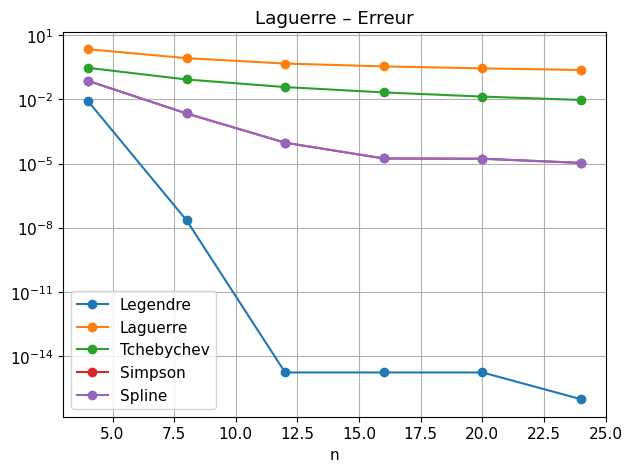

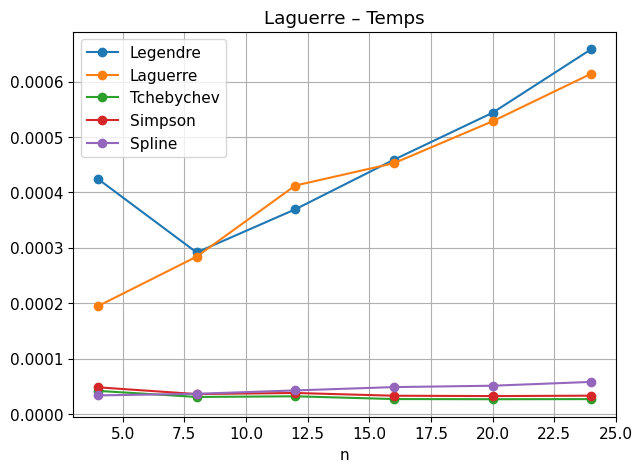

<lambdifygenerated-10>:2: RuntimeWarning: divide by zero encountered in divide
  return 1/sqrt(1 - x**2)
C:\Users\OK\AppData\Local\Temp\ipykernel_16752\1238098273.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  z[i+1] = 2*(y[i+1]-y[i])/h - z[i]


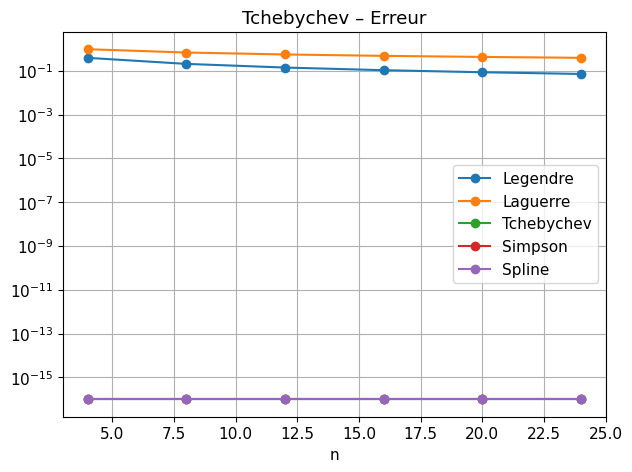

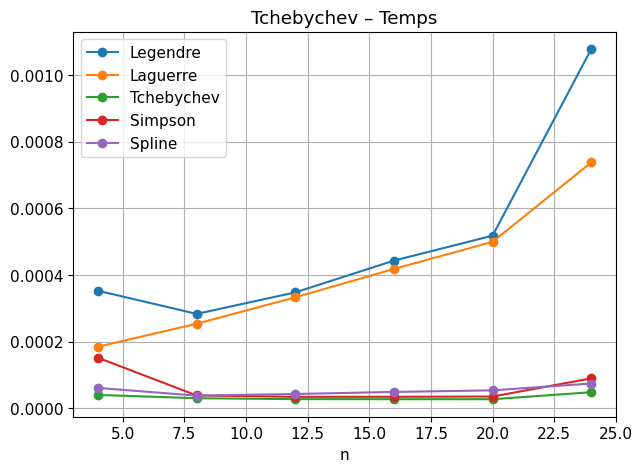

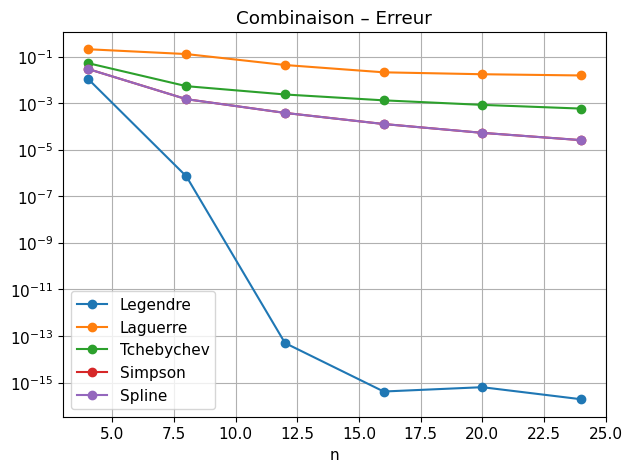

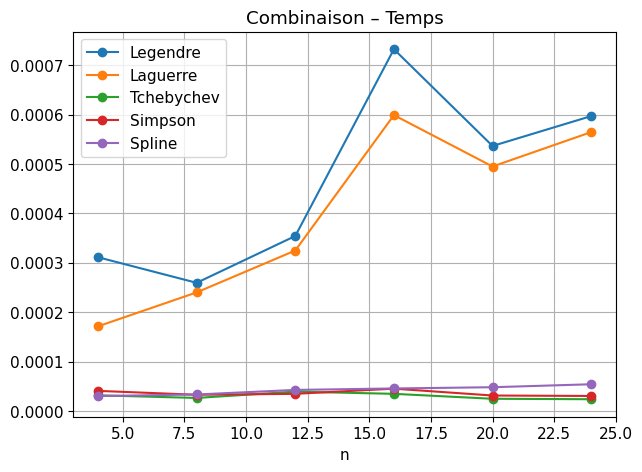

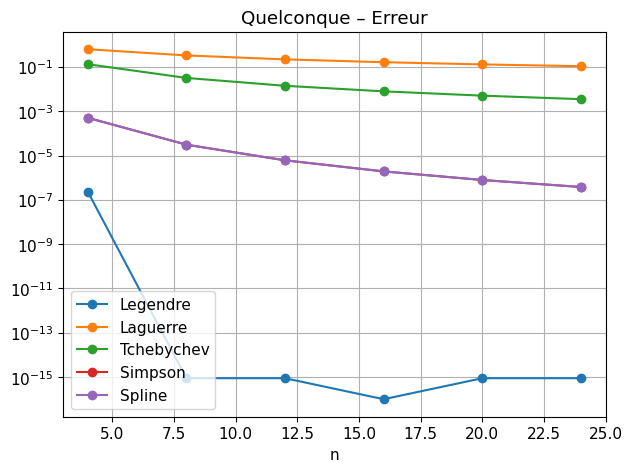

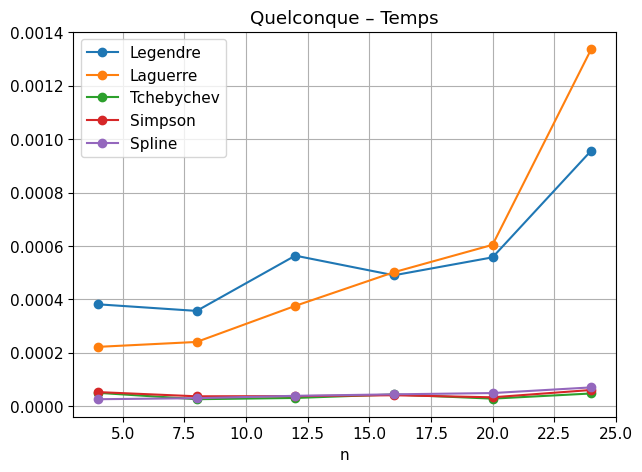

In [ ]:
# Valeurs de n à tester
n_vals = [4,8,12,16,20,24]
# ---------------------------------------------------
    # la boucle principale et les graphiques
# ---------------------------------------------------
for test in fonctions:
    f_sym = test["f"]
    a,b = test["a"], test["b"]
    f_num = sp.lambdify(x, f_sym, "numpy")
    I_exact = float(sp.integrate(f_sym, (x,a,b)))
    erreurs = {m:[] for m in methodes}
    temps   = {m:[] for m in methodes}
    for n in n_vals:
        for nom,meth in methodes.items():
            e,t = evaluer(meth, f_num, a, b, n, I_exact)
            erreurs[nom].append(e)
            temps[nom].append(t)
    # Graphe erreur
    plt.figure()
    for m in erreurs:
        plt.plot(n_vals, erreurs[m], marker='o', label=m)
    plt.yscale("log")
    plt.title(test["nom"]+" – Erreur")
    plt.xlabel("n")
    plt.legend()
    plt.grid()
    plt.show()
    # Graphe temps
    plt.figure()
    for m in temps:
        plt.plot(n_vals, temps[m], marker='o', label=m)
    plt.title(test["nom"]+" – Temps")
    plt.xlabel("n")
    plt.legend()
    plt.grid()
    plt.show()

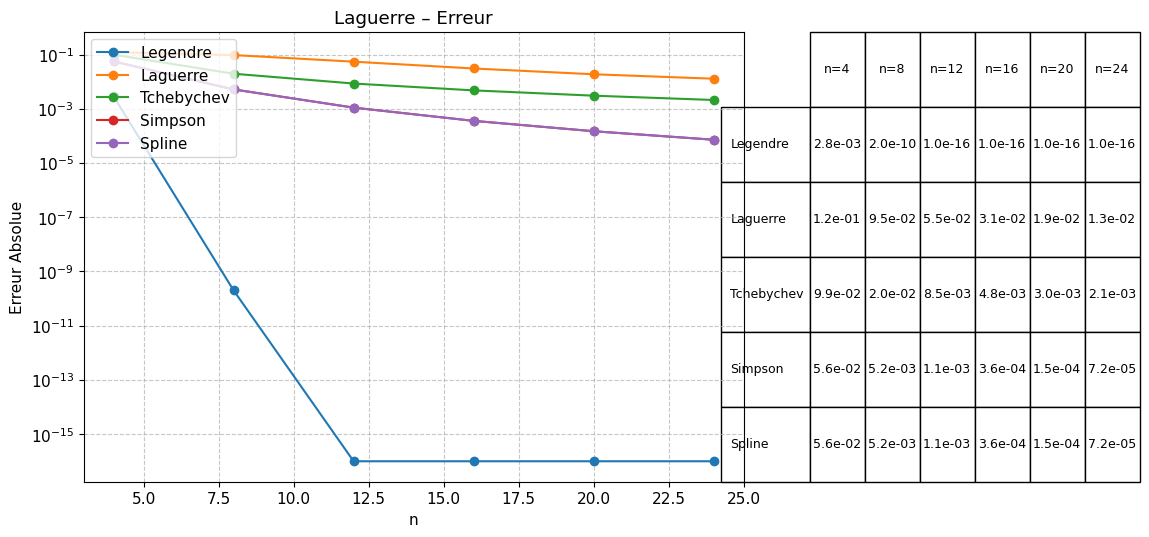

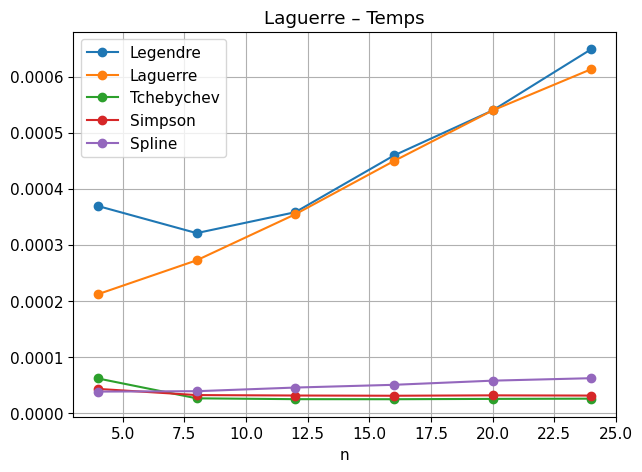

<lambdifygenerated-14>:2: RuntimeWarning: divide by zero encountered in divide
  return 1/sqrt(1 - x**2)


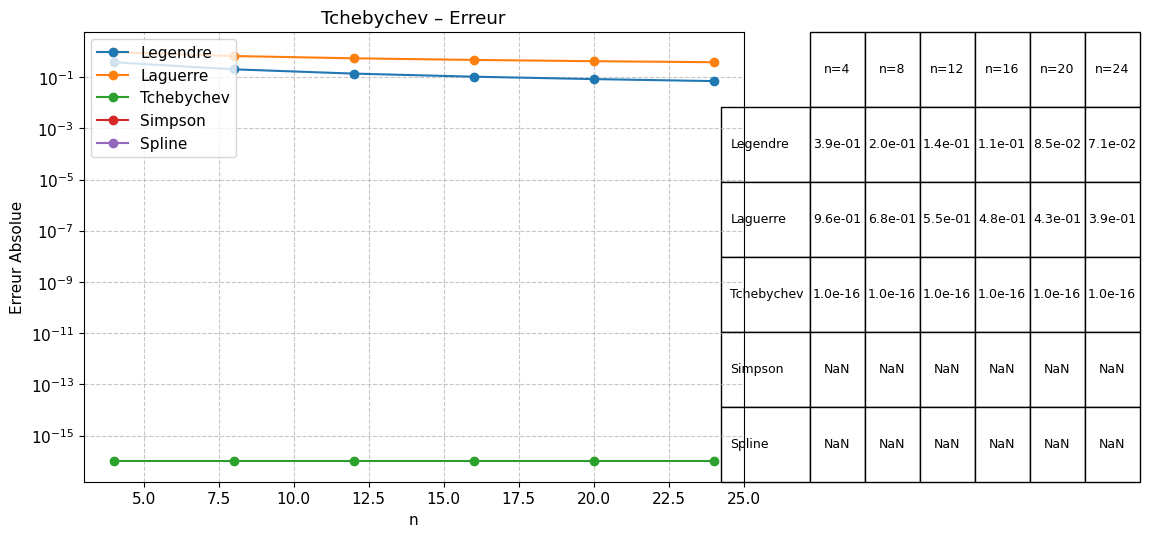

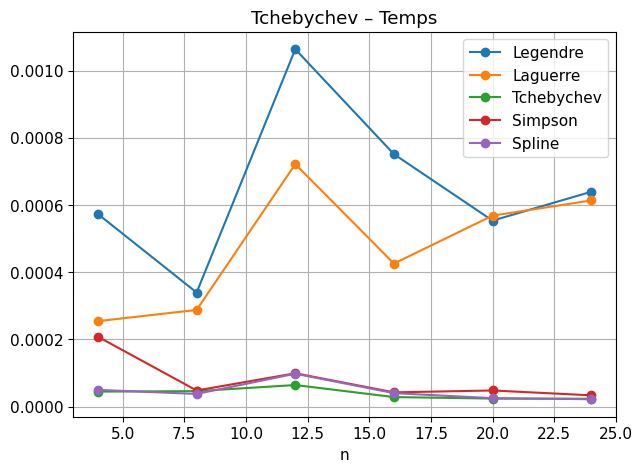

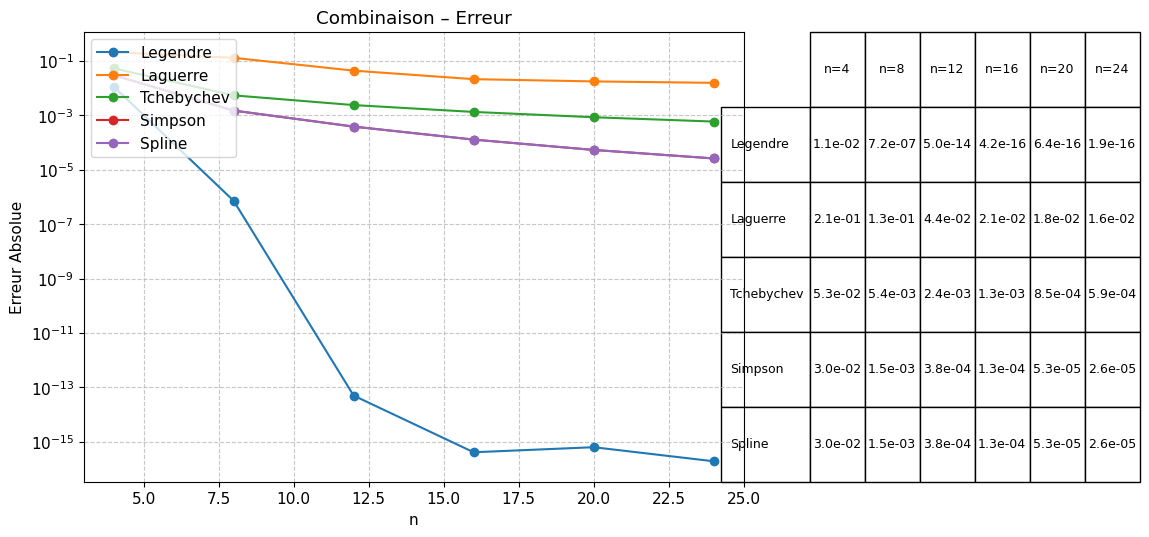

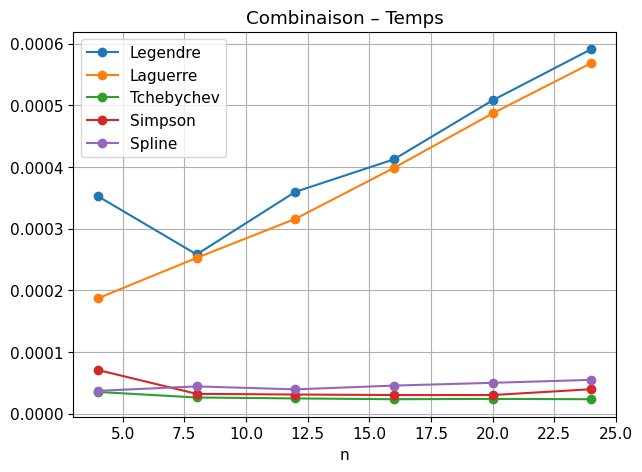

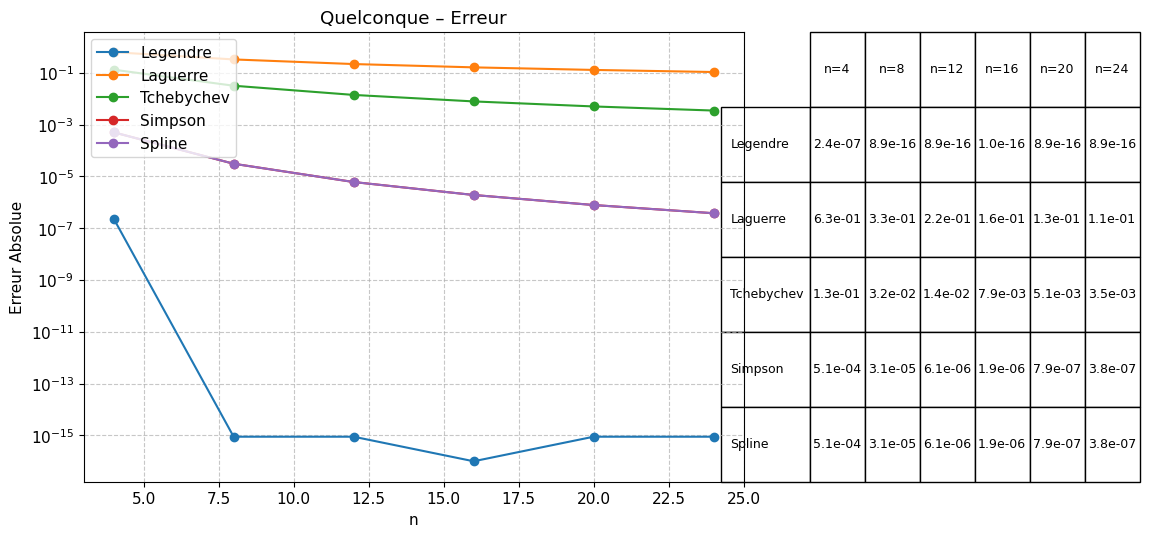

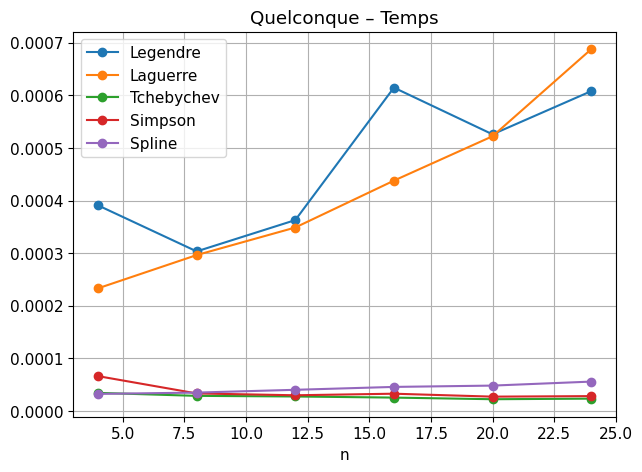

In [12]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time

# Configuration graphique
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["font.size"] = 11

# ---------------- Méthodes d'intégration ----------------
def gauss_legendre(f, a, b, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    x = 0.5*(b-a)*nodes + 0.5*(a+b)
    return 0.5*(b-a)*np.dot(weights, f(x))

def simpson(f, a, b, n):
    if n % 2 != 0:
        n += 1
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/3)*(y[0]+y[-1]+4*np.sum(y[1:-1:2])+2*np.sum(y[2:-1:2]))

def spline_quadratique(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = x[1]-x[0]
    z = np.zeros(n+1)
    # Amélioration légère : évite le crash si y[0] est infini, mais propage NaN
    if np.isfinite(y).all():
        z[0] = (y[1]-y[0])/h
        for i in range(n):
            z[i+1] = 2*(y[i+1]-y[i])/h - z[i]
        I = 0
        for i in range(n):
            a_i = (z[i+1]-z[i])/(2*h)
            b_i = z[i]
            c_i = y[i]
            I += a_i*h**3/3 + b_i*h**2/2 + c_i*h
        return I
    else:
        return np.nan

def gauss_laguerre(f, a, b, n):
    nodes, weights = np.polynomial.laguerre.laggauss(n)
    def g(t):
        x = a + (b-a)*t/(1+t)
        dxdt = (b-a)/(1+t)**2
        return f(x)*dxdt*np.exp(t)
    return np.dot(weights, g(nodes))

def gauss_tchebychev(f, a, b, n):
    k = np.arange(1, n+1)
    t = np.cos((2*k-1)*np.pi/(2*n))
    w = np.pi/n
    x = 0.5*(a+b) + 0.5*(b-a)*t
    dxdt = 0.5*(b-a)
    return w*np.sum(f(x)*dxdt*np.sqrt(1-t**2))

# ---------------- Fonction d'évaluation modifiée ----------------
def evaluer(methode, f, a, b, n, I_exact):
    t0 = time.perf_counter()
    try:
        I_num = methode(f, a, b, n)
    except Exception:
        I_num = np.nan

    t_exec = time.perf_counter() - t0
    
    # MODIFICATION ICI : On garde le NaN si le calcul a échoué (infini ou erreur)
    if not np.isfinite(I_num):
        err = np.nan
    else:
        err = abs(I_exact - I_num)
        if err == 0:
            err = 1e-16 # Pour éviter log(0) sur le graphe

    if not np.isfinite(t_exec) or t_exec == 0:
        t_exec = 1e-16
        
    return err, t_exec

# ---------------- Définition des tests ----------------
x = sp.symbols("x")
fonctions = [
    # Gauss–Laguerre
    {"nom":"Laguerre", "f": (x**2+1)*sp.exp(-x), "a":0, "b":5},
    # Tchebychev
    {"nom":"Tchebychev", "f": 1/sp.sqrt(1-x**2), "a":-1, "b":1},
    # Combinaison
    {"nom":"Combinaison", "f": (x**2+1)*sp.exp(-x)*sp.cos(3*x), "a":0, "b":3},
    # Fonction quelconque
    {"nom":"Quelconque", "f": sp.sin(x)+x**2, "a":0, "b":2}
]

methodes = {
    "Legendre": gauss_legendre,
    "Laguerre": gauss_laguerre,
    "Tchebychev": gauss_tchebychev,
    "Simpson": simpson,
    "Spline": spline_quadratique
}

n_vals = [4,8,12,16,20,24]

# ---------------- Boucle principale ----------------
for test in fonctions:
    f_sym = test["f"]
    a,b = test["a"], test["b"]
    f_num = sp.lambdify(x, f_sym, "numpy")
    I_exact = float(sp.integrate(f_sym, (x,a,b)))
    
    erreurs = {m:[] for m in methodes}
    temps   = {m:[] for m in methodes}
    
    for n in n_vals:
        for nom,meth in methodes.items():
            e,t = evaluer(meth, f_num, a, b, n, I_exact)
            erreurs[nom].append(e)
            temps[nom].append(t)
            
    # =======================================================
    # NOUVEAU BLOC : GRAPHE + TABLEAU
    # =======================================================
    fig, ax = plt.subplots(figsize=(12, 6)) # Figure plus large
    
    # 1. Le graphique
    for m in erreurs:
        # On ne trace que les valeurs valides (pas les NaN)
        data = np.array(erreurs[m], dtype=float)
        ax.plot(n_vals, data, marker='o', label=m)
        
    ax.set_yscale("log")
    ax.set_title(test["nom"] + " – Erreur")
    ax.set_xlabel("n")
    ax.set_ylabel("Erreur Absolue")
    ax.grid(True, which="both", linestyle="--", alpha=0.7)
    ax.legend(loc='upper left')

    # 2. Préparation des données pour le tableau
    cell_text = []
    rows = list(methodes.keys())
    cols = [f"n={n}" for n in n_vals]

    for m in methodes:
        row_data = []
        for val in erreurs[m]:
            if np.isnan(val):
                row_data.append("NaN") # Affiche NaN explicitement
            else:
                row_data.append(f"{val:.1e}") # Format scientifique court
        cell_text.append(row_data)

    # 3. Création du tableau à droite
    the_table = plt.table(cellText=cell_text,
                          rowLabels=rows,
                          colLabels=cols,
                          loc='right',
                          cellLoc='center',
                          colWidths=[0.1]*len(cols),
                          bbox=[1.1, 0.0, 0.5, 1.0]) # [x, y, largeur, hauteur]

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(9)

    # 4. Ajustement des marges (Laisser de la place à droite pour le tableau)
    plt.subplots_adjust(left=0.1, bottom=0.15, right=0.65, top=0.9)
    plt.show()
    # =======================================================

    # Graphe temps (inchangé, sauf taille figure)
    plt.figure(figsize=(7,5))
    for m in temps:
        plt.plot(n_vals, temps[m], marker='o', label=m)
    plt.title(test["nom"]+" – Temps")
    plt.xlabel("n")
    plt.legend()
    plt.grid()
    plt.show()